In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
item=pd.read_csv("items.csv")

In [3]:
itemcat=pd.read_csv("item_categories.csv")
shop=pd.read_csv("shops.csv")
train=pd.read_csv('sales_train.csv')
test=pd.read_csv("test.csv")

In [4]:
train.head()
Id = test['ID']
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [5]:
test.shape

(214200, 3)

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [8]:
train['date'] = pd.to_datetime(train['date'])

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [10]:
train.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [11]:
train['date'] = train['date'].apply(lambda x: x.strftime("%Y-%m"))

In [12]:
train.head().sort_values(by = 'date')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
4,2013-01,0,25,2555,1099.00,1.0
0,2013-02,0,59,22154,999.00,1.0
1,2013-03,0,25,2552,899.00,1.0
2,2013-05,0,25,2552,899.00,-1.0
3,2013-06,0,25,2554,1709.05,1.0


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [14]:
train.drop(['date_block_num','item_price'] , axis =1, inplace= True)

In [15]:
train.head().sort_values(by = 'date')

,date,shop_id,item_id,item_cnt_day
4,2013-01,25,2555,1.0
0,2013-02,59,22154,1.0
1,2013-03,25,2552,1.0
2,2013-05,25,2552,-1.0
3,2013-06,25,2554,1.0


<AxesSubplot:xlabel='date'>

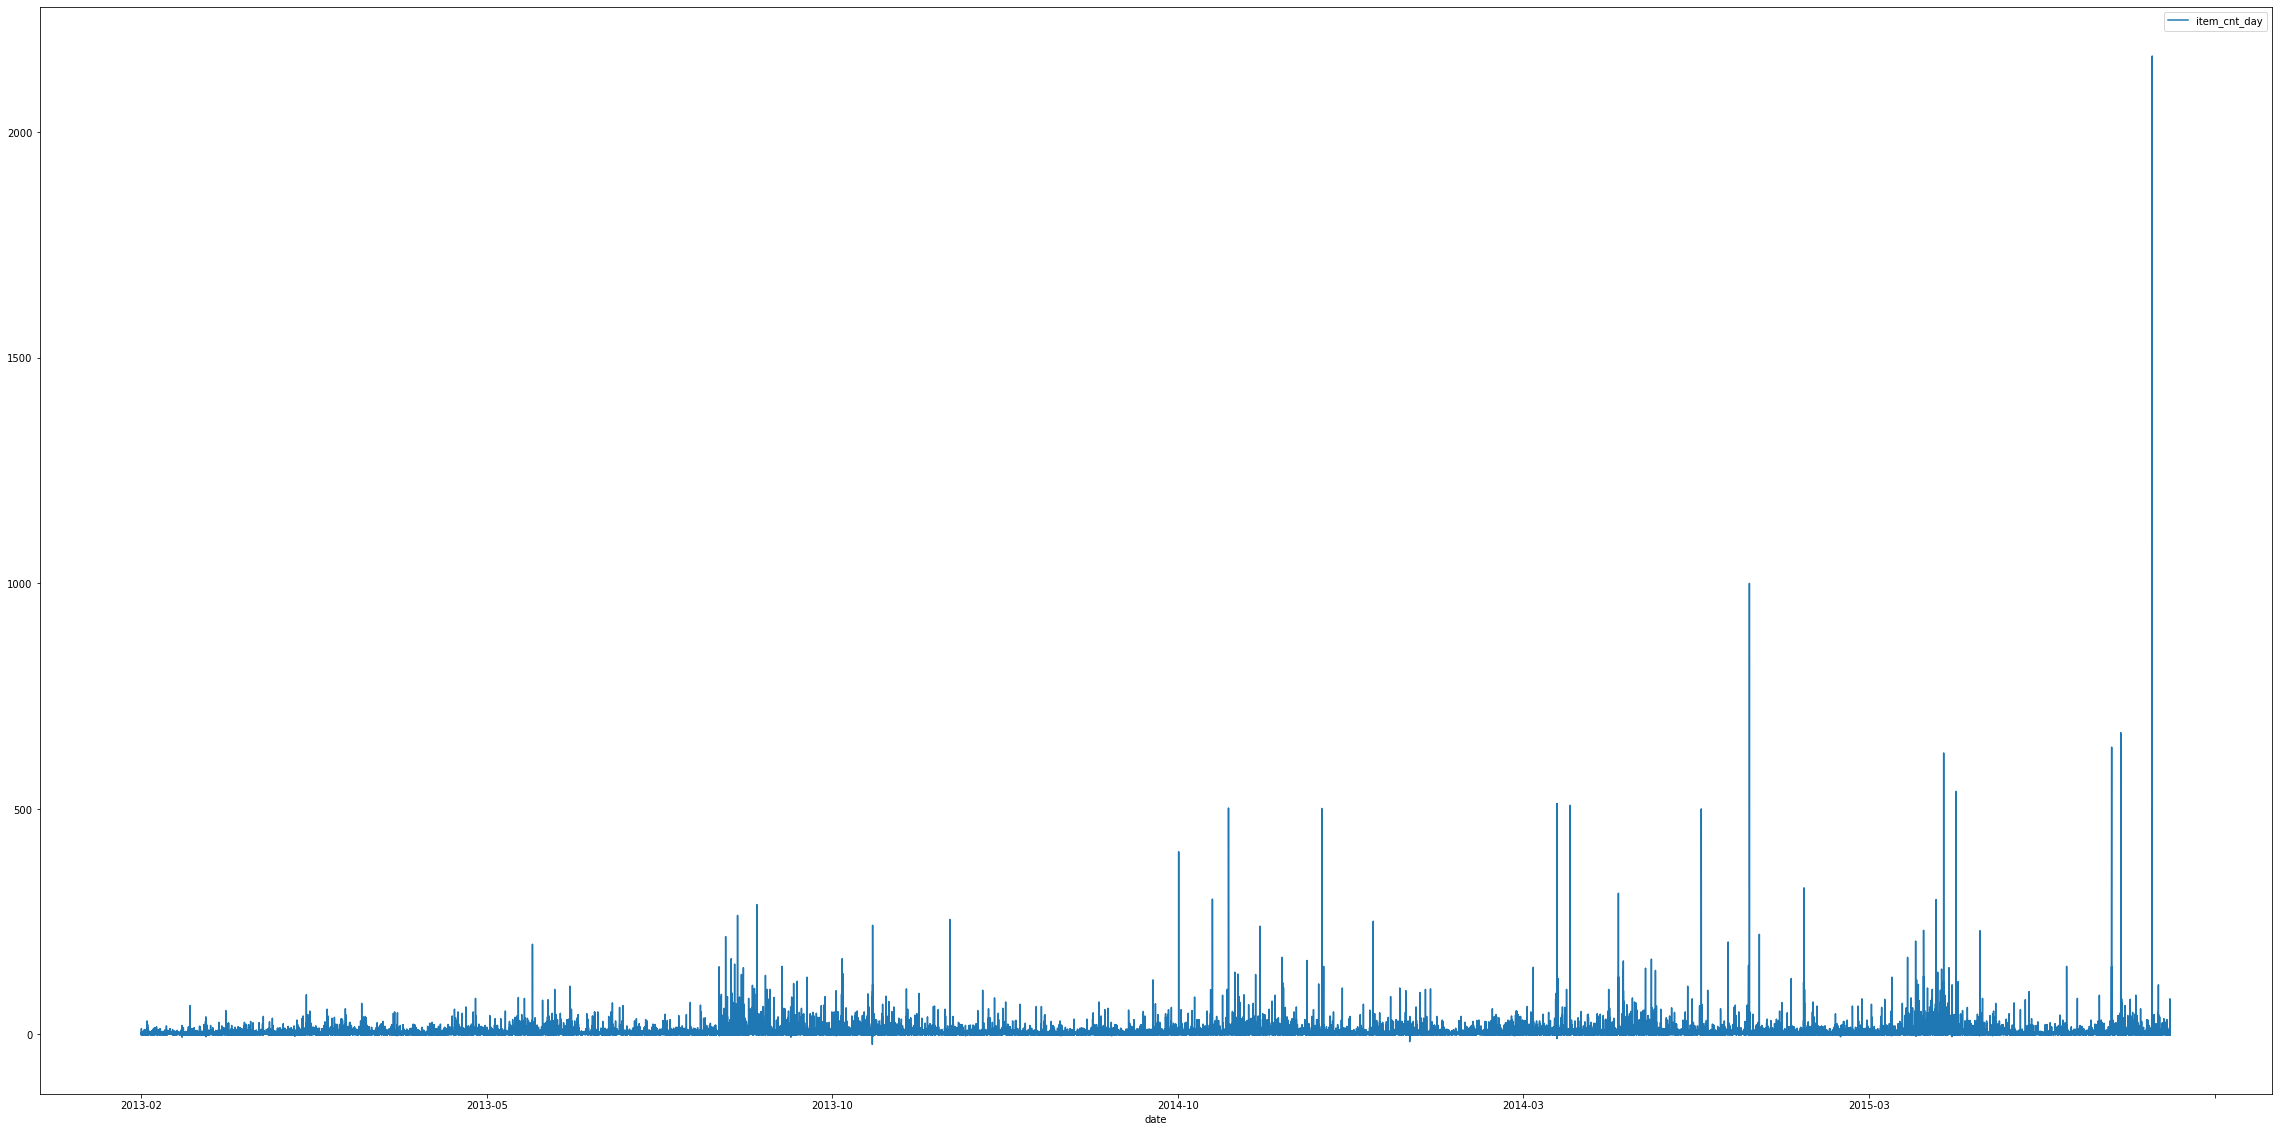

In [16]:
train.plot(x='date',y='item_cnt_day',figsize= (40,20))

In [17]:
train[["shop_id","item_id","date","item_cnt_day"]].groupby(["shop_id","item_id"])\
            .agg({"date":["min",'max'],"item_cnt_day":"sum"})

date          item_cnt_day
                     min      max          sum
shop_id item_id                               
0       30       2013-02  2013-02         31.0
        31       2013-02  2013-02         11.0
        32       2013-01  2013-12         16.0
        33       2013-01  2013-07          6.0
        35       2013-01  2013-10         15.0
...                  ...      ...          ...
59      22154    2013-02  2013-02          1.0
        22155    2013-11  2013-11          1.0
        22162    2015-01  2015-11         16.0
        22164    2015-02  2015-11          6.0
        22167    2013-03  2014-06          4.0

[424124 rows x 3 columns]

In [18]:
data = train.groupby(['date','shop_id','item_id']).sum()
data

item_cnt_day
date    shop_id item_id              
2013-01 0       32                4.0
                33                2.0
                35                2.0
                43                1.0
                51                2.0
...                               ...
2015-12 59      21421             1.0
                21669             1.0
                21872             1.0
                21968            -1.0
                22088             2.0

[1799395 rows x 1 columns]

In [19]:
data = train.pivot_table(index=['shop_id','item_id'], columns='date', values='item_cnt_day', fill_value=0)
data.reset_index(inplace=True)
data.head()

date,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,0,30,0.000000,3.444444,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,31,0.000000,1.571429,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,32,1.333333,1.500000,2.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,33,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,35,1.000000,1.200000,0.0,1.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
test_data = pd.merge(test, data, on=['shop_id','item_id'], how='left')
test_data.drop(['ID', '2013-01'], axis=1, inplace=True)
test_data = test_data.fillna(0)

In [22]:
test_data.head()

,shop_id,item_id,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.5,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
from sklearn.pipeline import Pipeline

In [25]:
Y = data['2015-10'].values
X = data.drop(['2015-10'], axis = 1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(339299, 37)
(339299,)
(84825, 37)
(84825,)


In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Train set mse:', mean_squared_error(y_train, lr.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, lr.predict(X_test)))
print('Train set score:', lr.score(X_train,y_train))

Train set mse: 0.16787448603179816
Test set mse: 0.39908049557834446
Train set score: 0.8313997296561091


In [ ]:
rndm_forst = RandomForestRegressor(n_estimators = 100)
rndm_forst.fit(X_train, y_train)
print('Train set mse:', mean_squared_error(y_train, rndm_forst.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, rndm_forst.predict(X_test)))
print('Train set score:', rndm_forst.score(X_train,y_train))

In [ ]:
prediction = rndm_forst.predict(test_data)

In [ ]:
prediction = list(map(round, prediction))

In [ ]:
submission=pd.read_csv('sample_submission.csv')
print(submission.shape)
submission.head()

In [ ]:
submission['item_cnt_month'] = prediction
submission.to_csv('prediction.csv', index=False)
submission.head()

In [ ]:
print(prediction)